## Midterm 1 :  Physics 403, S25
Aidan Meador-Woodruff (ameadorw@ur.rochester.edu)

Due: Friday March 7, 2025

In [220]:
# Import statements
import numpy as np
from matplotlib import pyplot as plt

### Problem 1 : A Card Game
*We consider a deck of cards with 52 cards, in which there are 13 cards of 4 suits, ranking A, 2-10, J,Q,K.* 

---

*a).* We suppose we randomly draw one card from the deck. We wish to know the probability it is either a King or a Heart. To solve this, we use the inclusion-exclusion principle derived in Homework 1. We wish to find $P(H\cup K)$, which is
$$P(H\cup K) = P(H) + P(K) - P(H\cap K)$$

The probability of drawing a heart is 13 cards out of 52, which is a quarter:

$$P(H) = \frac{13}{52} = \frac{1}{4}$$

The probability of drawing a king is 4 cards out of 52, which is 

$$P(K) = \frac{4}{52} = \frac{1}{13}$$

Lastly, the probability that the card is a heart _and_ a king is exactly 1 out of 52 cards, or

$$P(H \cap K) = \frac{1}{52}$$

Therefore, the probability that we draw a heart or a king is 

$$P(H \cup K) = \frac{13}{52} + \frac{4}{52} -\frac{1}{52} = \frac{16}{52}$$
which simplifies to
$$\boxed{P(H\cup K) = \frac{4}{13}}$$
---
*b).* We wish to determine if drawing a king and drawing a heart are independent probabilities. They are independent if we have that the intersection is the product of their individual probabilities. That is, if 
$$P(H)P(K) = P(H \cap K)$$

From part a, we substitute in $P(H) = \frac{1}{4}$ and $P(K) = \frac{1}{13}$. This means that 

$$P(H)P(K) = \frac{1}{4}\cdot\frac{1}{13} = \frac{1}{52}$$
which is exactly what we found for $P(H \cap K)$ above. Hence, the events are **independent**. 

---
*c).* Now we add a joker to the deck, which has no suit. We wish to determine if drawing a king and a heart are independent. There are 53 cards in the deck now, but the same number of hearts and kings. Now, the probability of drawing a king is 

$$P(K) = \frac{4}{53}$$
and the probability of drawing a heart is
$$P(H) = \frac{13}{53}$$
The probability of drawing a king and a heart is
$$P(H \cap K ) = \frac{1}{53}$$

So, the product $P(K)P(H)$ is
$$P(K)P(H) = \frac{4}{53}\cdot \frac{13}{53} = \frac{52}{2809} \neq \frac{1}{53}$$
Hence, we see these probabilities are now **not independent**.

### Problem 2 : A Board Game
*We suppose that we have a floor covered in long parallel boards of width $d$. We get bored and invent a game where we stand in the middle of the room and drop pencils of length $L$ at random on the floor. Sometimes it lands completely inside one board, and sometimes it lands on the seam between two boards.*

---

*a).* If $L<d$, we wish to find the probability that a pencil will land on the seam between the boards. We parameterize the probability according to the hint, with the distance $x$ between the center of the pencil and the acute angle $\theta$ between the pencil and seam. We assume, since we are throwing these pencils all willy-nilly, that $x$ is uniformly distributed between $0$ and $d/2$, and, likewise, $\theta$ uniformly distributed between $0$ and $\pi$ (not $2\pi$ due to symmetry). Then, if the pencil is at a distance of 
$$x \leq \frac{L}{2}\sin\theta$$ 
it lands between two boards and crosses the seam. Then, the probability of crossing a seam is the integral over the two uniform distributions
$$P(x \leq L/2) = \frac{1}{\pi}\cdot \frac{2}{d}\int_{0}^\pi \mathrm{d} \theta ~~ \frac{L}{2} \sin \theta$$
Combining constants, we see that 
$$P(x \leq L/2) = \frac{L}{d\pi}\cdot \int_{0}^\pi  \mathrm{d} \theta ~\sin \theta$$
Which integrates to 
$$\boxed{P(x \leq L/2) = \frac{2L}{d\pi}}$$

---
*b).* Now, we wish to write a short Monte Carlo program that simulates drops of the pencil onto the floor-boards at random positions and orientations. Using the number of times the pencil
crosses a seam, the total number of drops, and the result from part a, compute a Monte Carlo estimate of $\pi$.

The code is below:

In [15]:
# Problem 2b : Computing Pi.

# Parameters
L = 1  # Pencil length
d = 2  # Board width (d > L)
N = 100000  # N trials

x = np.random.uniform(0,d/2,N) # Generate a uniform dist. of x in the bounds above.
theta = np.random.uniform(0,np.pi, N) # Same for theta.

# Condition generates a mask for if the pencil is at the right angle to cross.
crossed = x <= (L/2) * np.sin(theta)

# This is the frequentist probability. Number of times we cross divided by trials converges to our desired probability.
P = np.sum(crossed)/N

# Since P -> 2L/d*pi, then pi -> 2L/(d*p)
pi = 2*L/(d*P)

print(f"Estimated π: {pi}")

Estimated π: 3.1490112104799093


Not the worst estimate in the world! I ran it for 100,000,000 and it got pretty close, but for the sake of computation reduced to 100,000.

### Problem 3 : Parameter Estimation with Log-Likelihood

*We now go back to the data of HW4. We had two datasets that generated $y_i = \pi x_i$ with Gaussian uncertainties of $\sigma = 0.4$ and $\sigma = 4.0$ for datasets 1 and 2.*  

---

*a).* We wish to find analytical expressions for the estimator $\hat{m}$ and the reliability $\sigma_{\hat{m}}$ in terms of sums using $x_i, y_i, \sigma$. The likelihood is 
$$\mathcal{L}(m) = \prod_{i} \frac{1}{\sqrt{2\pi}\sigma}\exp\left(- \frac{(y_i - mx_i)^2}{2\sigma^2}\right)$$
The log likelihood is then 
$$\ln \mathcal{L}(m) = - \sum_{i} \left[\frac{(y_i - mx_i)^2}{2\sigma^2} + \frac{1}{2}\ln(2\pi \sigma^2)\right]$$
We know that the best estimator for $m$ will be found where the derivative of the log likelihood with respect to $m$ is zero. That is,

$$\frac{\mathrm{d}}{\mathrm{d}m} \ln \mathcal{L}(m) = \sum_i \frac{(y_i - mx_i)}{\sigma^2}x_i = 0$$

Solving for $m$, we split the sum as 

$$\sum_i \frac{y_i}{\sigma^2}x_i - \hat{m} \sum_i \frac{x_i^2}{\sigma^2} = 0 $$

Then, we find that 
$$\boxed{\hat{m} = \frac{\sum_i y_i x_i}{\sum_i x_i^2}}$$

To find the reliability, we take the second derivative of the log likelihood with respect to $m$, 

$$\frac{\mathrm{d}^2}{\mathrm{d}m^2} \ln \mathcal{L}(m) = -\sum_i \frac{x_i^2}{\sigma^2} $$

From class, we know that 

$$\sigma_{\hat m} = \left(-\frac{\mathrm{d}^2}{\mathrm{d}m^2} \ln \mathcal{L}(m)\right)^{-1/2}$$

Hence, the reliability of the estimator $\hat{m}$ is

$$\boxed{\sigma_{\hat m} =\left(\sum_i \frac{x_i^2}{\sigma^2}\right)^{-1/2}}$$
---
*b).* Next, we wish to compute the estimator and its uncertainty numerically. This is done in the cell below.

In [ ]:
# Problem 3b : Finding the estimators and reliabilities. 

# Import the data (I just have it in the same directory).
data1 = np.loadtxt("data1.txt").transpose()
data2 = np.loadtxt("data2.txt").transpose()

# Split the data into its columns.
x1,y1,sigma1 = data1[0], data1[1], data1[2]
x2,y2,sigma2 = data2[0], data2[1], data2[2]

# The estimators
mest1 = np.sum(x1*y1)/np.sum(x1**2)
mest2 = np.sum(x2*y2)/np.sum(x2**2)

# The reliabilites
rel1 = np.sum(x1**2/sigma1**2)**(-1/2)
rel2 = np.sum(x2**2/sigma2**2)**(-1/2)

print(f'The estimator m hat for dataset 1 is {mest1:0.4g} with a reliability of sigma_m {rel1:0.3g}')
print(f'The estimator m hat for dataset 2 is {mest2:0.4g} with a reliability of sigma_m {rel2:0.3g}')

The estimator m hat for dataset 1 is 3.128 with a reliability of sigma_m 0.0237
The estimator m hat for dataset 2 is 3.041 with a reliability of sigma_m 0.237


*c).* For each dataset, we wish to plot the log-likelihood as a function of the parameter $m$ and the estimate $\sigma_{\hat m}$ from $\Delta \ln \mathcal{L} = \frac{1}{2}$. We wish to compare it to part a. 

We do this in the cell below.


The estimated m for the first dataset is 3.13 with a 1-sigma confidence interval of 0.02002.
The estimated m for the second dataset is 3.04 with a 1-sigma confidence interval of 0.2362.


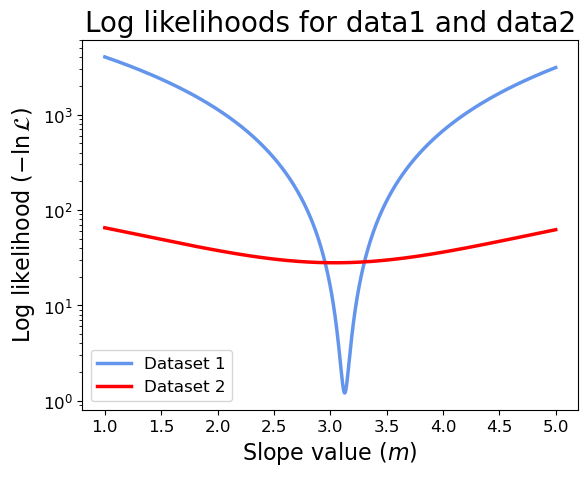

In [206]:
## Problem 3c : Plotting Log-Likelihood

def log_likelihood(m,x,y,sigma):
    '''ln L computation for the 1D case'''
    return -0.5 * np.sum((y-m*x)**2/(sigma**2) + np.log(2*np.pi*sigma**2))

# Defining m values to iterate through.
m_vals = np.linspace(1,5,1000)

# Finding the log likelihoods for each array.
logL1 = np.array([log_likelihood(m,x1,y1, sigma1) for m in m_vals])
logL2 = np.array([log_likelihood(m,x2,y2, sigma2) for m in m_vals])

# Find the maximum slope value in the log likelihood (MPV)
m_max1 = m_vals[np.argmax(logL1)]
m_max2 = m_vals[np.argmax(logL2)]

# Setting up for the condition that Delta log L = 1/2 to find sigma
deltaL1 =  np.max(logL1) - logL1
deltaL2 =  np.max(logL2) - logL2

# Find sigmas
msigma1 = m_vals[np.where(deltaL1 <= 0.5)[0][0]]
msigma2 = m_vals[np.where(deltaL2 <= 0.5)[0][0]]

plt.semilogy(m_vals, -(logL1), color='cornflowerblue', linewidth=2.5);
plt.semilogy(m_vals, -(logL2), color='red', linewidth=2.5);
plt.ylabel(r'Log likelihood ($-\ln \mathcal{L}$)',fontsize=16)
plt.xlabel(r'Slope value ($m$)',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Log likelihoods for data1 and data2',fontsize=20)
plt.legend(['Dataset 1','Dataset 2'],fontsize=12)
print(f'The estimated m for the first dataset is {m_max1:0.3g} with a 1-sigma confidence interval of {m_max1 - msigma1:0.4g}.')
print(f'The estimated m for the second dataset is {m_max2:0.3g} with a 1-sigma confidence interval of {m_max2 - msigma2:0.4g}.')

Of note, this plot is the negative of the log likelihood and semi log-scaled, as I thought it would be illustrative to see how precise the first dataset is. We note that the values of the estimator $\hat{m}$ and $\sigma_{\hat{m}}$ seem to be quite close to what we found in part a!

---

*d).* Lastly, we wish to use a linear model with the intercept free and plot the log-likelihood for the same datasets as a function of $m$ and $b$. We wish to draw a contour for $\Delta \mathcal{L} = 1.15$ for dataset 1, and compare the maximum likelihood $\mathcal{L} (\hat{m})$ in the 1D case to $\mathcal{L}(\hat{m},\hat{b})$ in the 2D case. 

In [219]:
## Problem 3d : Linear Model

def log_likelihood2D(m,b,x,y,sigma):
    '''ln L computation for the 2D case'''
    return -0.5 * np.sum((y-m*x-b)**2/(sigma**2) + np.log(2*np.pi*sigma**2))


# Make these smaller, as if they are N big, the likelihood arrays are N^2 lol
m_vals = np.linspace(2,4,500)
b_vals = np.linspace(-0.5,0.5,500)

# Compute log likelihood now iterating over both m and b. Only doing this for dataset 1
logL1_2D = np.array([[log_likelihood2D(m,b,x1,y1, sigma1) for b in b_vals] for m in m_vals])

# Find m and b max now instead of just m. Unravel this, as it is a 2D array
m_max2D, b_max2D = np.unravel_index(np.argmax(logL1_2D), logL1_2D.shape)
m_max2D = m_vals[m_max2D]
b_max2D = b_vals[b_max2D]

# Now restrict Delta L
deltaL1_2D =  np.max(logL1_2D) - logL1_2D
contour = 1.15
print(f'The most likely value of m in the 2D case for dataset 1 is {m_max2D:0.3g} and b is {b_max2D:0.3g}')

The most likely value of m in the 2D case for dataset 1 is 3.12 and b is 0.0391


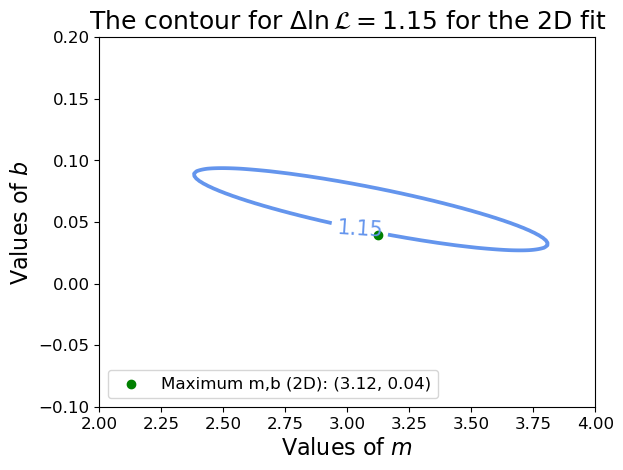

In [216]:
# Plot the contour and most probable values of m and b for 2D.
plt.scatter(m_max2D, b_max2D, color='green', label=f'Maximum m,b (2D): ({m_max2D:.2f}, {b_max2D:.2f})')
CS = plt.contour(m_vals, b_vals, deltaL1_2D,  levels=[contour],colors='cornflowerblue',linewidths=2.7)
plt.clabel(CS, inline=1, fontsize=15)
plt.xlim(2, 4)
plt.ylim(-0.1,0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'Values of $m$',fontsize=16)
plt.ylabel(r'Values of $b$',fontsize=16)
plt.title(r'The contour for $\Delta \ln \mathcal{L} = 1.15$ for the 2D fit',fontsize=18)
plt.legend(loc='lower left', fontsize=12);

In [217]:
print(f'The maximum of log L for dataset 1 in the 2D case is {np.max(logL1_2D):0.5g}')
print(f'The maximum of log L for dataset 1 in the 1D case is {np.max(logL1):0.5g}')

The maximum of log L for dataset 1 in the 2D case is -1.1802
The maximum of log L for dataset 1 in the 1D case is -1.2031


We see here that the maximum of the log for the 2D case is higher (less negative) than in the 1D case. This makes sense, as in the 2D case, we have an additional degree of freedom, which we expect to correspond to a higher log likelihood value (even if the data shouldn't have an intercept!)